### Introduction

- Goal is the development of a model that can predict whether or not a given existing customer is likely to purchase an additional insurance product from the company.
- Here we have dataset of information on more than 14,000 observations of 1 response/dependent variable (which indicates whether or not the new insurance product was purchased i.e. TARGET) and 14 explanatory/independent variables.
- Data dictonary can be found here https://github.com/getfitwithapurv/datascience/blob/69328d0108b3cda98b5e060034cba01a8361cd44/Screenshot%202023-03-05%20at%204.28.09%20PM.png

Steps:
1. Load the data and do some EDA work to gain some insights from the dataset.
2. Depending upon the information we learn from EDA work and also domain knowledge of the data, we will try to find key errors and pitfalls in the data which might create problem in futher model training. 
4. Compare the data before and after the transformations and give conclusion.
5. Selecting the features for further modeling
6. Regression Modeling (at least three different binomial logistic regression models) and evaluate the performance of models via cross validation using the training data set
7. Select the “best” regression model from those we have constructed and apply preferred model to the testing subset and assess how well it performs on that previously unseen data.
8. Conclusion

In [136]:
# load the pandas library
import pandas as pd
import numpy as np
# importing dataset from github. This data set contains information related to different types of wines
filename = "https://raw.githubusercontent.com/getfitwithapurv/datascience/main/M7_Data.csv"
df1 = pd.read_csv(filename)
df1.head()

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3


In [137]:
df1 #sanity check

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14011,Y,99,151601,30,2,0,0,0,0,0,386.434278,284.309508,2,30,3
14012,Y,1,151634,27,2,2,1,3,3,1,376.842591,266.993794,2,27,27
14013,Y,99,151679,26,2,0,0,0,0,0,434.805703,284.629361,2,26,3
14014,Y,1,151804,75,2,1,1,3,3,1,366.273857,270.573265,2,75,15


### Exploratory Data Analysis , Data Preparation & Prepped Data Review

In [138]:
df1.shape # 14016 rows and 15 columns

(14016, 15)

In [139]:
# checking datatype and null values of data set
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14016 entries, 0 to 14015
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TARGET      14016 non-null  object 
 1   loyalty     14016 non-null  int64  
 2   ID          14016 non-null  int64  
 3   age         14016 non-null  int64  
 4   city        14016 non-null  int64  
 5   LOR         14016 non-null  int64  
 6   prod_A      14016 non-null  int64  
 7   type_A      14016 non-null  int64  
 8   type_B      14016 non-null  int64  
 9   prod_B      14016 non-null  int64  
 10  turnover_A  14016 non-null  float64
 11  turnover_B  14016 non-null  float64
 12  contract    14016 non-null  int64  
 13  age_P       14016 non-null  int64  
 14  lor_M       14016 non-null  int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 1.6+ MB


In [140]:
# check for missing values
df1.isnull().sum()

TARGET        0
loyalty       0
ID            0
age           0
city          0
LOR           0
prod_A        0
type_A        0
type_B        0
prod_B        0
turnover_A    0
turnover_B    0
contract      0
age_P         0
lor_M         0
dtype: int64

In [141]:
# Check the statistical information for the dataset
df1.describe()

,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
count,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.0,14016.000000,14016.000000
mean,50.381778,37672.440068,35.882920,-710.950128,0.926299,0.533818,1.607877,1.918878,0.599458,379.161320,328.628207,2.0,35.882920,14.115582
std,48.471790,44855.639209,12.974634,26702.329184,0.965212,0.498873,1.508991,1.686038,0.490026,92.612207,475.616525,0.0,12.974634,11.582550
min,0.000000,1.000000,5.000000,-999999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.095909,191.962852,2.0,5.000000,3.000000
25%,2.000000,6741.500000,25.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.919412,219.406925,2.0,25.000000,3.000000
50%,3.000000,13514.500000,33.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,367.891493,237.656757,2.0,33.000000,15.000000
75%,99.000000,62738.000000,43.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,399.744924,264.131538,2.0,43.000000,15.000000
max,99.000000,151811.000000,102.000000,235.000000,6.000000,1.000000,6.000000,9.000000,1.000000,5568.784139,12249.084770,2.0,102.000000,75.000000


In [142]:
#Assign 'Yes' as 1 and 'No' as 0 in Target column of dataset 
df1['TARGET'] = df1['TARGET'].map({'Y': 1, 'N': 0}) 

In [143]:
df1 #sanity check

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,1,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,1,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,1,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,1,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,1,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14011,1,99,151601,30,2,0,0,0,0,0,386.434278,284.309508,2,30,3
14012,1,1,151634,27,2,2,1,3,3,1,376.842591,266.993794,2,27,27
14013,1,99,151679,26,2,0,0,0,0,0,434.805703,284.629361,2,26,3
14014,1,1,151804,75,2,1,1,3,3,1,366.273857,270.573265,2,75,15


In [144]:
# importing seaborn and matplotlib pyplot libraries 
import seaborn as sns
import matplotlib.pyplot as plt

In [145]:
sorted(df1["age"].unique()) #unique ages

[5,
 10,
 11,
 12,
 13,
 14,
 15,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 100,
 102]

age and age_p are duplicate columns 

In [146]:
len(df1["age"].unique()) #total count of unique ages in the dataset

86

In [147]:
sorted(df1["city"].unique()) #unique cities

[-999999,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 22,
 23,
 28,
 30,
 31,
 33,
 47,
 49,
 51,
 53,
 58,
 72,
 73,
 84,
 89,
 94,
 104,
 107,
 110,
 111,
 114,
 115,
 116,
 121,
 122,
 125,
 126,
 127,
 129,
 131,
 137,
 141,
 142,
 148,
 161,
 174,
 177,
 178,
 187,
 191,
 197,
 209,
 219,
 229,
 235]

In [148]:
len(df1["city"].unique()) #total count of unique cities in the dataset

65

In [149]:
df1["type_A"].unique() #unique types of product A

array([0, 3, 6])

In [150]:
df1["type_B"].unique() #unique types of product B

array([0, 3, 6, 9])

In [151]:
df1 = df1.drop(columns=['age_P']) # removing age_P because it is same as age
df1

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,lor_M
0,1,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,3
1,1,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,39
2,1,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,27
3,1,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,3
4,1,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14011,1,99,151601,30,2,0,0,0,0,0,386.434278,284.309508,2,3
14012,1,1,151634,27,2,2,1,3,3,1,376.842591,266.993794,2,27
14013,1,99,151679,26,2,0,0,0,0,0,434.805703,284.629361,2,3
14014,1,1,151804,75,2,1,1,3,3,1,366.273857,270.573265,2,15


In [152]:
sorted(df1["LOR"].unique()) #unique length of relationship in years

[0, 1, 2, 3, 4, 5, 6]

In [153]:
sorted(df1["lor_M"].unique()) #unique Length of relationship in months

[3, 15, 27, 39, 51, 63, 75]

Here we can observe that for 0 years - length of relationship in months is 3 months. Hence in every following year length of relationship is 3 months more than usual year of 12 months

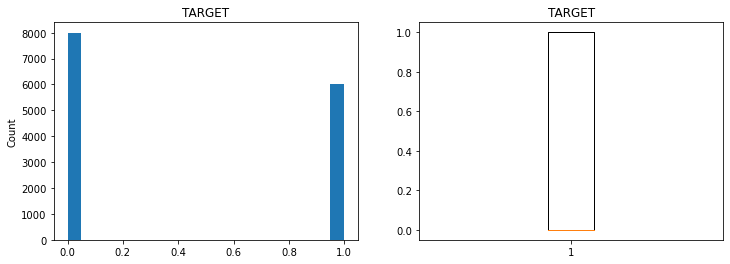

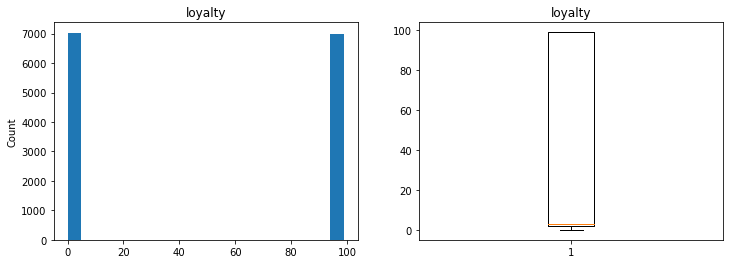

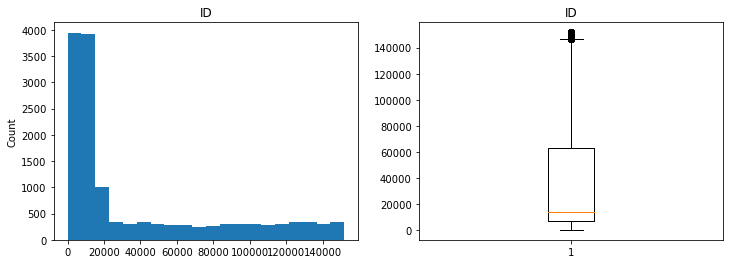

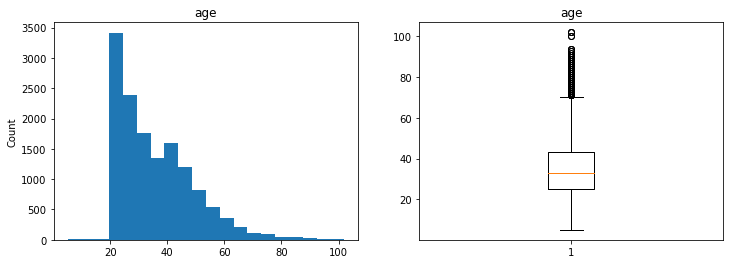

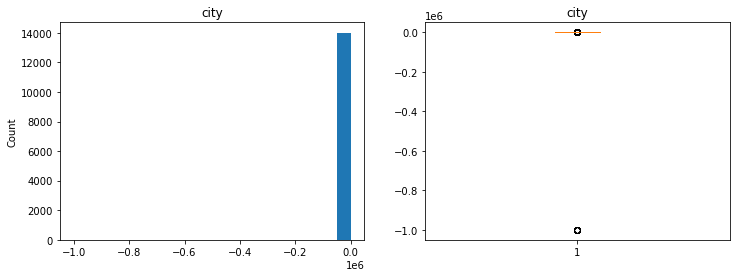

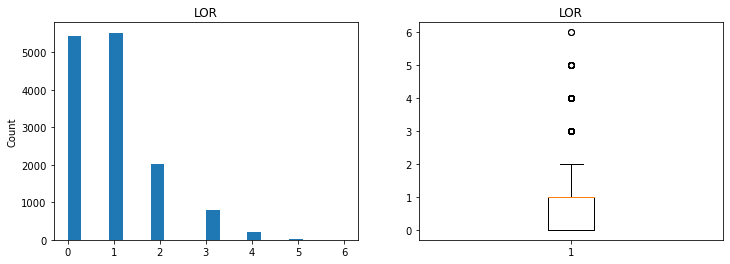

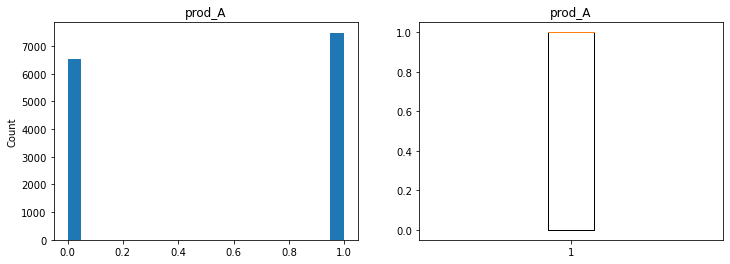

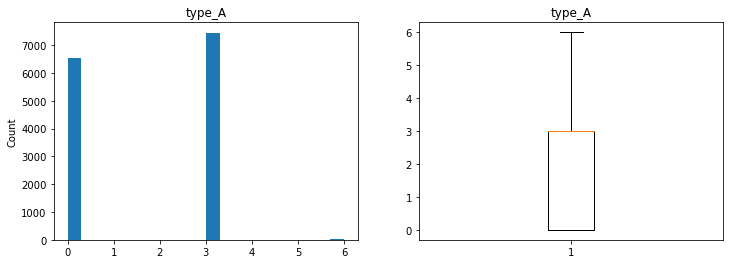

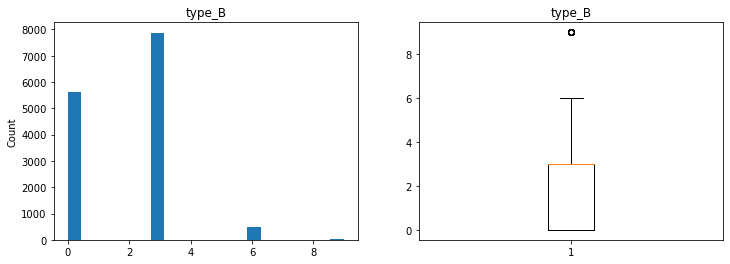

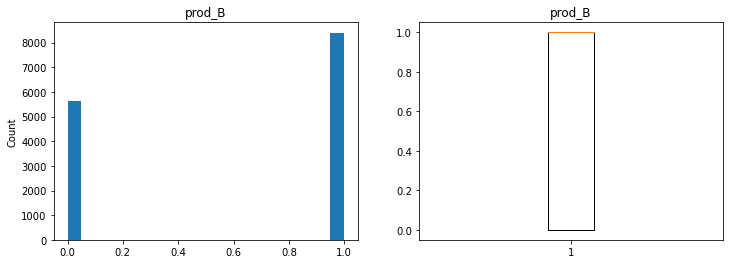

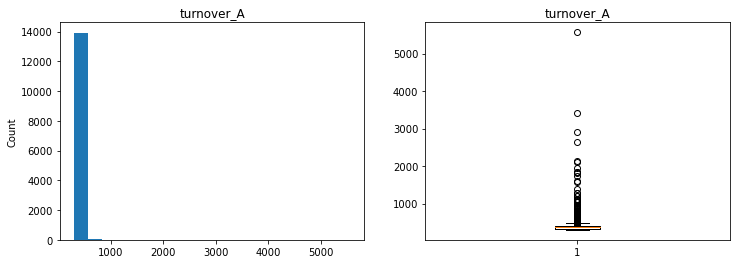

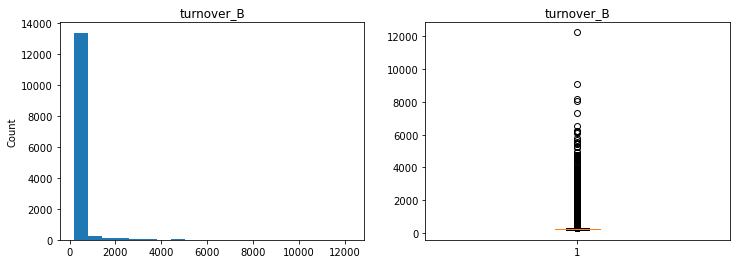

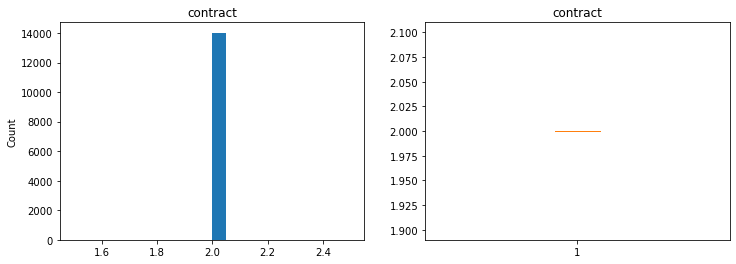

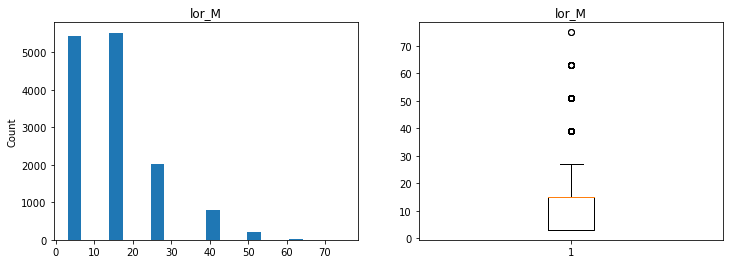

In [154]:
# import pyplot for graph creating
import matplotlib.pyplot as plt

# for each column, create a histogram and boxplot side by side
for i in range(0,14):
    figure, axis = plt.subplots(1, 2,figsize=(12,4))
    a=df1.iloc[:,i]
    axis[0].hist(a, bins=20)
    axis[0].set_title(df1.columns[i])
    axis[0].set_ylabel("Count")
    axis[1].boxplot(a)
    axis[1].set_title(df1.columns[i])
    plt.show()

Text(0.5, 1.0, 'TARGET')

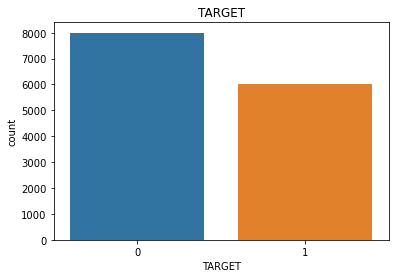

In [155]:
#getting countplot of TARGET which is response variable
ax = sns.countplot(x="TARGET", data=df1)
plt.title('TARGET')

Approx 8000 (57% of total) is 0 and 6000(43% of total) is 1

In [156]:
df_X = df1.drop('TARGET', axis=1) #without Target 

<AxesSubplot:>

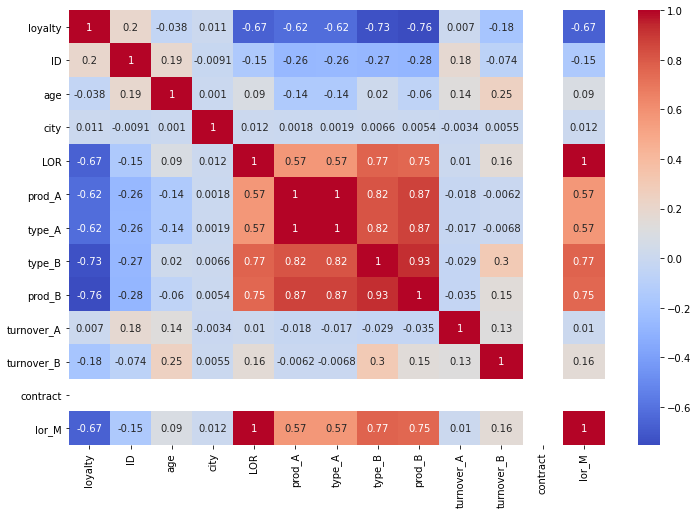

In [157]:
#heatmap for independent variables 
corr_X = (df_X).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_X, annot=True, cmap='coolwarm')

Observations from the heat map shown above : 
- LOR is highly correlated with prod_B/Type B
- loyalty is highly correlated with LOR and thus also lor_M
- loyalty is highly correlated with prod_B/Type B
- age and age_p are duplicate
- LOR and lor_M are duplicate

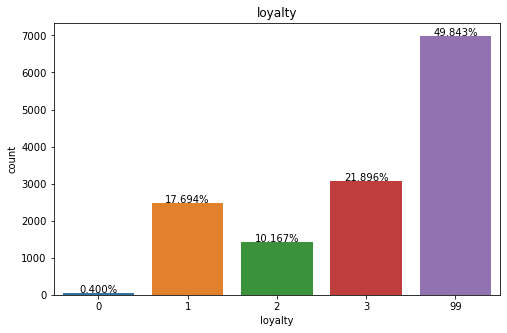

In [158]:
#count plot for loyalty column
plt.figure(figsize=(8, 5))
ax = sns.countplot(x="loyalty", data=df1)
plt.title('loyalty')
#display the percentage above the bar 
total = len(df1['loyalty'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")

- Unclassified loyalty is highest with 63.46%

<AxesSubplot:>

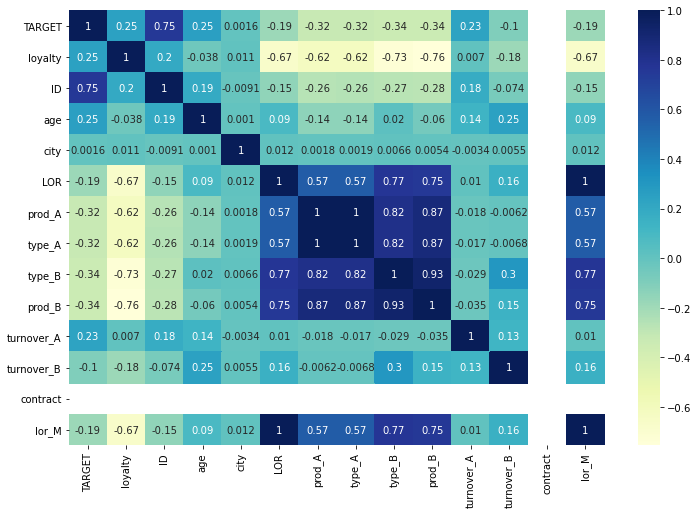

In [159]:
# heatmap with dependent i.e. TARGET variable
corr = (df1).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="YlGnBu")

- ID is highly correlated with TARGET

In [160]:
len(df1["ID"].unique()) #length of unique IDs in dataset

11008

- Our dataset has 140008 rows which means some of the ids are duplicate.
- 3008 duplicate records in the dataset

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ID', ylabel='Density'>

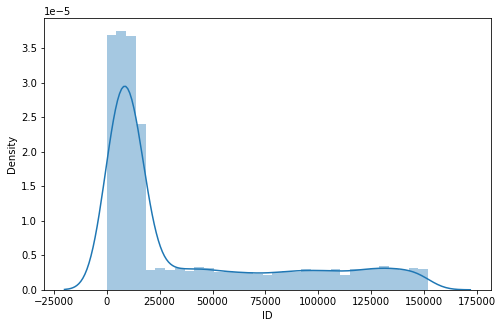

In [161]:
# Distribution plot for ID column
plt.figure(figsize=(8, 5))
sns.distplot(df1['ID'])

- Majority of the rows has lower IDs 

In [162]:
# checking for duplicate values of ID
df1['ID'].value_counts()

78412     2
19799     2
83585     2
87396     2
126307    2
         ..
8335      1
16531     1
10390     1
2202      1
2047      1
Name: ID, Length: 11008, dtype: int64

In [163]:
# remove duplicate records
df1 = df1.drop_duplicates(subset=['ID'])

In [164]:
df1 # 3008 duplicate records are removed and now 11008 records are remaining

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,lor_M
0,1,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,3
1,1,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,39
2,1,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,27
3,1,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,3
4,1,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11003,0,1,16793,33,2,2,1,3,3,1,302.380331,229.457986,2,27
11004,0,99,16794,23,2,0,0,0,0,0,316.268616,228.518505,2,3
11005,0,1,16798,23,2,2,1,3,3,1,385.871241,236.665515,2,27
11006,0,99,16800,32,2,1,1,3,3,1,317.578868,226.899614,2,15


Text(0.5, 1.0, 'TARGET')

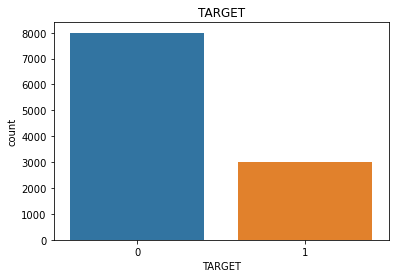

In [165]:
# After removing duplicates, checking share of people who bought additional insurance 
id1 = sns.countplot(x="TARGET", data=df1)
plt.title('TARGET')

Approx 8000 (73% of total) is 0 and 3000(27% of total) is 1 

- Before removing duplicate ID's: 
 57% didn't buy the new product and 43% bought the new product

- After removing duplicate ID's: 
 73% didn't buy the new product and 27% bought the new product

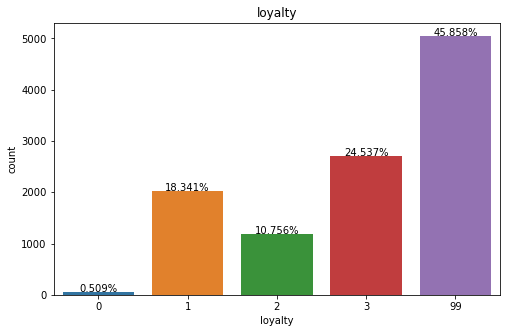

In [166]:
#count plot for loyalty column
plt.figure(figsize=(8, 5))
ax = sns.countplot(x="loyalty", data=df1)
plt.title('loyalty')
#display the percentage above the bar 
total = len(df1['loyalty'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")

- Before removing duplicate ID's: 63.4% unclassified
- After removing duplicate ID's: 46% unclassified

In [167]:
unclassified_loyalty = df1[df1['loyalty'] == 99] 

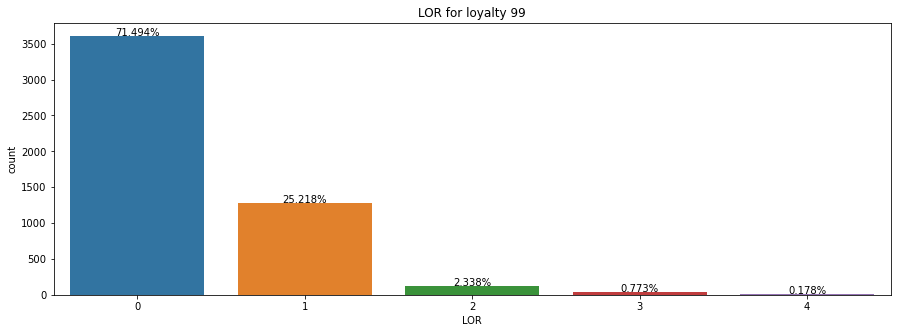

In [168]:
# plotting length of relationship distribution for unclassified loyalty 
plt.figure(figsize=(15, 5))
ax = sns.countplot(x="LOR", data=unclassified_loyalty)
plt.title('LOR for loyalty 99')
#display the percentage above the bar
total = len(unclassified_loyalty['LOR'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")


- It can be observed that 71.5 % unclassified samples are LOR 0

In [169]:
df = df1

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


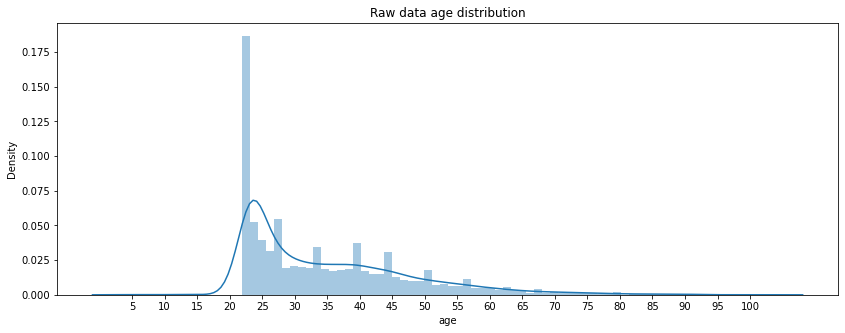

In [170]:
fig = plt.figure(figsize=(14, 5))
sns.distplot(df['age'],bins=80)
plt.xticks(np.arange(min(df['age']), max(df['age'])+1, 5))
plt.title('Raw data age distribution')
plt.show()

In [171]:
# Description of dataset after removing duplicates
df.describe()

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,lor_M
count,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.0,11008.000000
mean,0.273256,46.533612,27023.459938,34.845203,-724.143078,0.982649,0.584393,1.759448,2.097929,0.652253,372.332403,344.120565,2.0,14.791788
std,0.445651,48.292402,38576.841141,13.032781,26949.664365,0.939415,0.492849,1.490133,1.671441,0.476277,96.685932,524.372413,0.0,11.272981
min,0.000000,0.000000,1.000000,5.000000,-999999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.095909,191.962852,2.0,3.000000
25%,0.000000,2.000000,5480.000000,24.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,332.229899,218.302029,2.0,3.000000
50%,0.000000,3.000000,11025.500000,31.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,361.930298,235.025216,2.0,15.000000
75%,1.000000,99.000000,16632.250000,42.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,391.567662,253.759401,2.0,15.000000
max,1.000000,99.000000,151811.000000,102.000000,235.000000,6.000000,1.000000,6.000000,9.000000,1.000000,5568.784139,12249.084770,2.0,75.000000


In [172]:
df = df.drop(['lor_M'], axis=1) #since LOR and lor_M are duplicates (Years and months)

In [173]:
df.shape #sanity check

(11008, 13)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


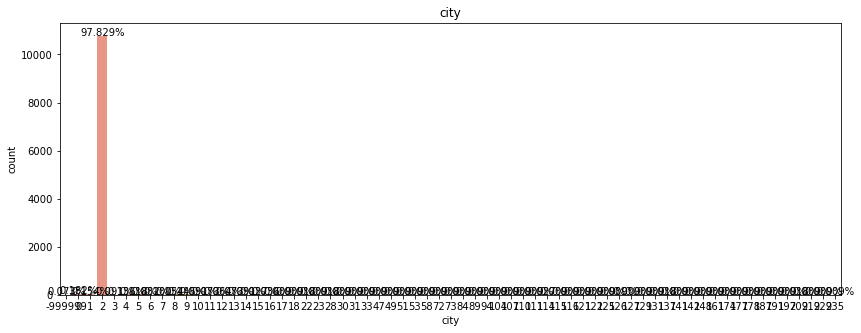

In [174]:
#distribution of unique cities
plt.figure(figsize=(14, 5))
ax = sns.countplot(df['city'])
plt.title('city')
#display the percentage above the bar 
total = len(df['city'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")


- we can observe that around 98% data is for city 2. Hence removing city column

In [175]:
df = df.drop('city', axis=1) #drop city column 

In [176]:
df["contract"].unique() #only single type of contract

array([2])

In [177]:
df = df.drop('contract', axis=1) #drop contract column 

In [178]:
df #sanity check 

,TARGET,loyalty,ID,age,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B
0,1,99,77,66,0,0,0,0,0,333.561114,264.721010
1,1,1,159,45,3,1,3,3,1,394.735699,284.904978
2,1,1,220,42,2,1,3,6,1,342.180990,1175.589721
3,1,99,303,31,0,0,0,0,0,453.757916,242.341754
4,1,99,306,62,0,0,0,0,0,384.577469,287.008370
...,...,...,...,...,...,...,...,...,...,...,...
11003,0,1,16793,33,2,1,3,3,1,302.380331,229.457986
11004,0,99,16794,23,0,0,0,0,0,316.268616,228.518505
11005,0,1,16798,23,2,1,3,3,1,385.871241,236.665515
11006,0,99,16800,32,1,1,3,3,1,317.578868,226.899614


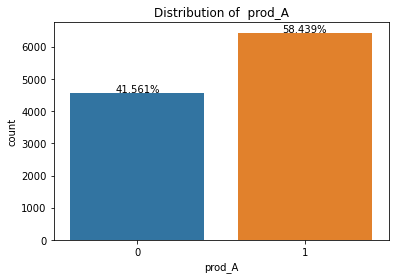

In [179]:
#checking distribution of prod A in the dataset, [Bought Product A (0=no, 1=yes)]
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="prod_A", data=df)
plt.title('Distribution of  prod_A')

#display the percentage above the bar
total = len(df['prod_A'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")

- 58.439% bought product A 
- 41.561% didn't buy product A

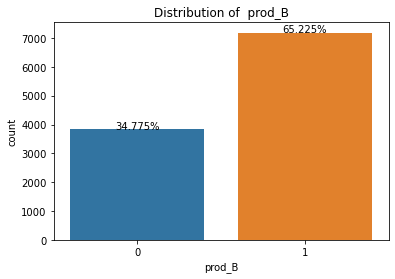

In [180]:
#checking distribution of prod B in the dataset, [Bought Product B (0=no, 1=yes)]
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="prod_B", data=df)
plt.title('Distribution of  prod_B')

#display the percentage above the bar
total = len(df['prod_B'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")

- 65.225% bought product B 
- 34.775% didn't buy product B

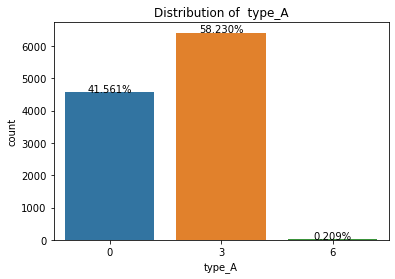

In [181]:
# Distribution of type of product A in the dataset
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="type_A", data=df)
plt.title('Distribution of  type_A')

total = len(df['type_A'])
for p in ax.patches:
    height = p.get_height()

    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")

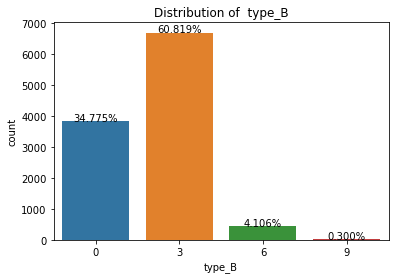

In [182]:
# Distribution of type of product B in the dataset
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="type_B", data=df)
plt.title('Distribution of  type_B')

total = len(df['type_B'])
for p in ax.patches:
    height = p.get_height()

    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")

In [183]:
# Removing Type_A and Type_B columns as it holds almost the same distribution as prod_A and prod_B
df = df.drop('type_A', axis=1) 
df = df.drop('type_B', axis=1)

In [184]:
df #sanity check

,TARGET,loyalty,ID,age,LOR,prod_A,prod_B,turnover_A,turnover_B
0,1,99,77,66,0,0,0,333.561114,264.721010
1,1,1,159,45,3,1,1,394.735699,284.904978
2,1,1,220,42,2,1,1,342.180990,1175.589721
3,1,99,303,31,0,0,0,453.757916,242.341754
4,1,99,306,62,0,0,0,384.577469,287.008370
...,...,...,...,...,...,...,...,...,...
11003,0,1,16793,33,2,1,1,302.380331,229.457986
11004,0,99,16794,23,0,0,0,316.268616,228.518505
11005,0,1,16798,23,2,1,1,385.871241,236.665515
11006,0,99,16800,32,1,1,1,317.578868,226.899614


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='turnover_A', ylabel='Density'>

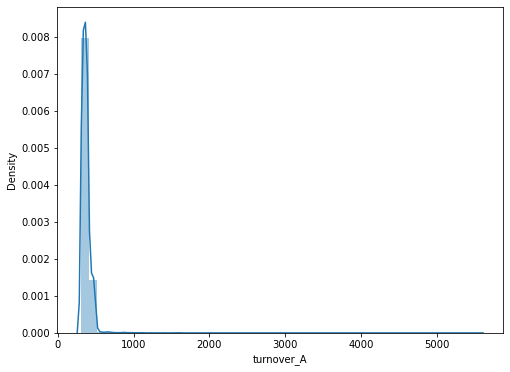

In [185]:
#for turnover of product A which is amount of money spent on Product A
plt.figure(figsize=(8, 6))
sns.distplot(df['turnover_A'])

It can observed that data is right skewed and need to be normalized

In [186]:
df['turnover_A'].describe() #description of amount of money spent on Product A

count    11008.000000
mean       372.332403
std         96.685932
min        300.095909
25%        332.229899
50%        361.930298
75%        391.567662
max       5568.784139
Name: turnover_A, dtype: float64

- It can be observed that 75% of the turnover_A is less than ~392

In [187]:
# checking effect of removing turnover A > 400 by creating new dataframe
df_turnover_A_reduced_plot = df.drop(df[df['turnover_A'] > 400].index)

In [188]:
df_turnover_A_reduced_plot['turnover_A'].describe()

count    9080.000000
mean      351.220479
std        28.544612
min       300.095909
25%       326.733590
50%       351.542267
75%       375.964745
max       399.999115
Name: turnover_A, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


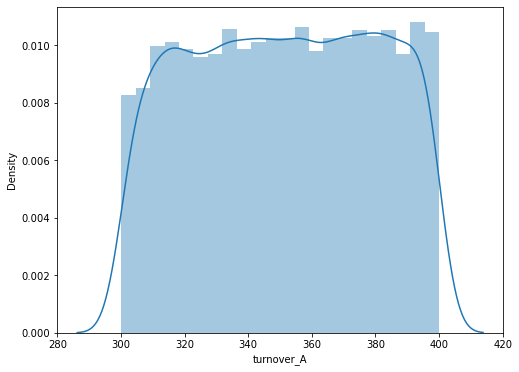

In [189]:
#plotting after removing amount of turnover above 400
plt.figure(figsize=(8, 6))
sns.distplot(df_turnover_A_reduced_plot['turnover_A'])
plt.show()

Normalized after reducing the data by removing the amount of turnover A above 400

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


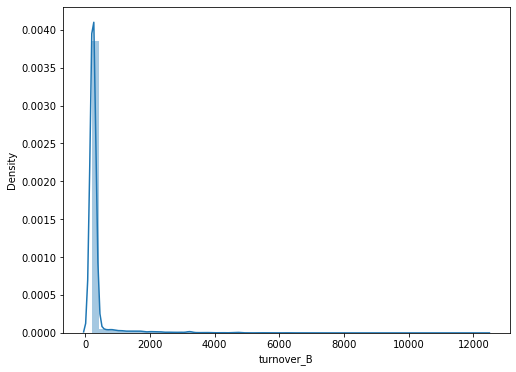

In [190]:
#for turnover of product B which is amount of money spent on Product B
plt.figure(figsize=(8, 6))
sns.distplot(df['turnover_B'])
plt.show()

It can be observed that this is also right skewed similar to product A turnover

In [191]:
df['turnover_B'].describe()

count    11008.000000
mean       344.120565
std        524.372413
min        191.962852
25%        218.302029
50%        235.025216
75%        253.759401
max      12249.084770
Name: turnover_B, dtype: float64

- It can be observed that 75% of the turnover_B is less than ~253

In [192]:
# checking effect of removing turnover A > 400 and turnover B > 260 by creating new dataframe
df_TO_A_B_reduced_plot = df_turnover_A_reduced_plot.drop(df_turnover_A_reduced_plot[df_turnover_A_reduced_plot['turnover_B'] >= 260].index)

In [193]:
df_TO_A_B_reduced_plot['turnover_B'].describe()

count    7579.000000
mean      226.990508
std        15.121378
min       191.962852
25%       214.301760
50%       227.148011
75%       239.687572
max       259.994027
Name: turnover_B, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


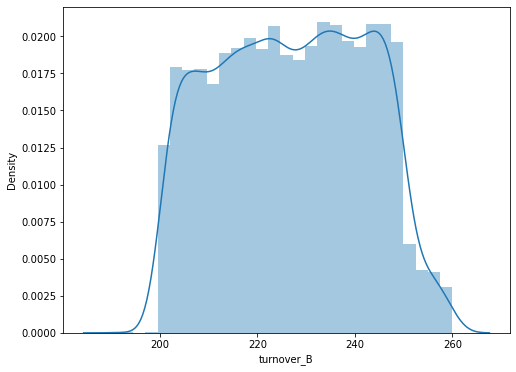

In [194]:
#plotting after removing amount of turnover above 400
plt.figure(figsize=(8, 6))
sns.distplot(df_TO_A_B_reduced_plot['turnover_B'])
plt.show()

Normalized after reducing the data by removing the amount of turnover B above 265

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


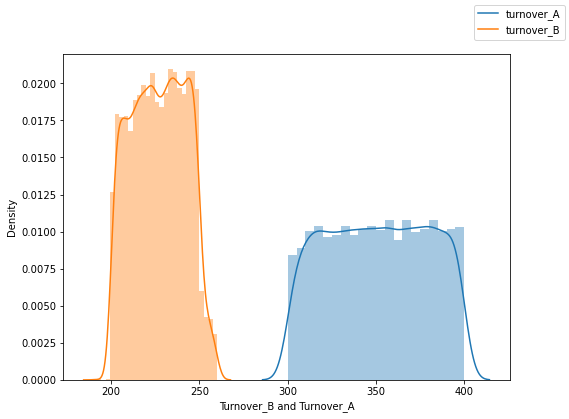

In [195]:
#Plotting turnover of product A as well as turnover of product B
fig = plt.figure(figsize=(8, 6))
sns_plot = sns.distplot(df_TO_A_B_reduced_plot['turnover_A'])
sns_plot = sns.distplot(df_TO_A_B_reduced_plot['turnover_B'])
fig.legend(labels=['turnover_A', 'turnover_B'])
plt.xlabel('Turnover_B and Turnover_A')
plt.show()
fig.tight_layout()

- Checking the impact in amount of data after removing rows in turnover_A and turnover_B

In [196]:
df.shape #earlier dataset without removing data from turnover_A and turnover_B

(11008, 9)

In [197]:
df_TO_A_B_reduced_plot.shape #after removing data 

(7579, 9)

In [198]:
dfr = df_TO_A_B_reduced_plot
dfr

,TARGET,loyalty,ID,age,LOR,prod_A,prod_B,turnover_A,turnover_B
11,1,1,631,36,2,1,1,373.652449,243.133339
12,1,99,653,38,0,0,0,389.783521,258.624804
13,1,99,669,36,0,0,0,392.346320,226.288709
15,1,1,731,51,1,1,1,381.603623,250.961389
18,1,99,940,30,0,0,0,383.709403,218.652892
...,...,...,...,...,...,...,...,...,...
11003,0,1,16793,33,2,1,1,302.380331,229.457986
11004,0,99,16794,23,0,0,0,316.268616,228.518505
11005,0,1,16798,23,2,1,1,385.871241,236.665515
11006,0,99,16800,32,1,1,1,317.578868,226.899614


##### Without reduction of data from turnover_A and turnover_B

<AxesSubplot:>

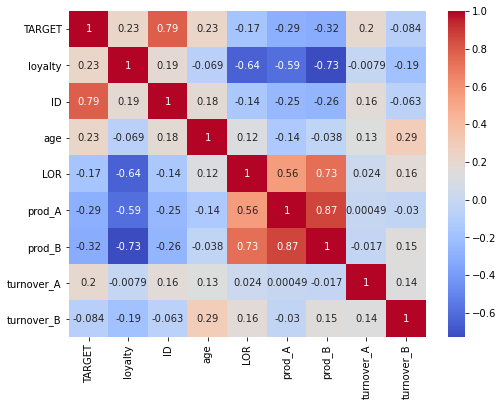

In [199]:
final = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(final, annot=True, cmap='coolwarm')

<AxesSubplot:>

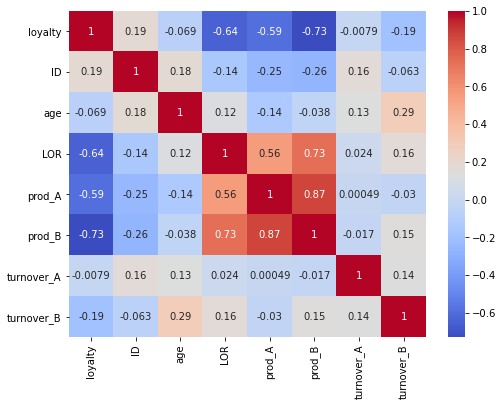

In [200]:
# without response variable TARGET
final_T = (df.drop('TARGET', axis=1)).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(final_T, annot=True, cmap='coolwarm')

<AxesSubplot:>

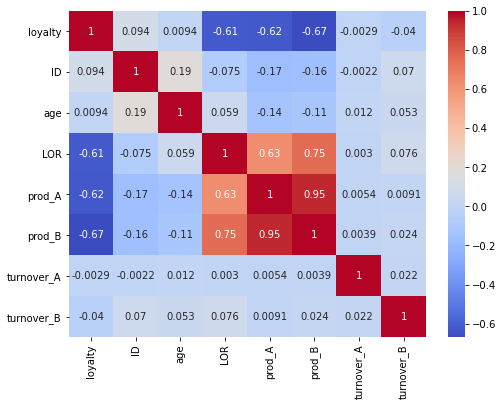

In [201]:
# without response variable TARGET
final_Tr = (dfr.drop('TARGET', axis=1)).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(final_Tr, annot=True, cmap='coolwarm')

<AxesSubplot:>

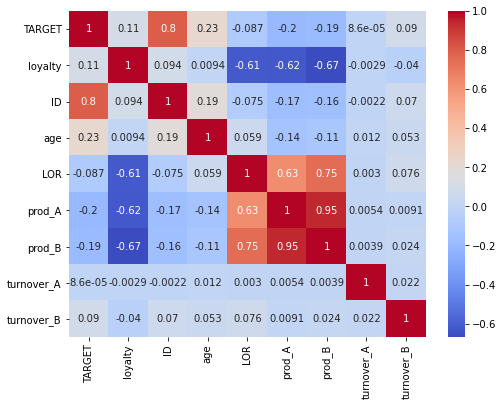

In [202]:
finalr = dfr.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(finalr, annot=True, cmap='coolwarm')

- We can see that after reducing the data by removing some values from turnover_A and turnover_B, the correlation among explanatory variables as well as with the TARGET(response variable) also changes 

### Regression Model Construction & Evaluation

In [203]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.svm import SVC

#### SVM Models

#### 1st Model (Reduced data)

In [204]:
X1 = dfr.drop('TARGET', axis=1).values
y1 = dfr['TARGET'].values

In [205]:
dfr #sanity check

,TARGET,loyalty,ID,age,LOR,prod_A,prod_B,turnover_A,turnover_B
11,1,1,631,36,2,1,1,373.652449,243.133339
12,1,99,653,38,0,0,0,389.783521,258.624804
13,1,99,669,36,0,0,0,392.346320,226.288709
15,1,1,731,51,1,1,1,381.603623,250.961389
18,1,99,940,30,0,0,0,383.709403,218.652892
...,...,...,...,...,...,...,...,...,...
11003,0,1,16793,33,2,1,1,302.380331,229.457986
11004,0,99,16794,23,0,0,0,316.268616,228.518505
11005,0,1,16798,23,2,1,1,385.871241,236.665515
11006,0,99,16800,32,1,1,1,317.578868,226.899614


In [206]:
X1 #sanity check

array([[1.00000000e+00, 6.31000000e+02, 3.60000000e+01, ...,
        1.00000000e+00, 3.73652449e+02, 2.43133339e+02],
       [9.90000000e+01, 6.53000000e+02, 3.80000000e+01, ...,
        0.00000000e+00, 3.89783521e+02, 2.58624804e+02],
       [9.90000000e+01, 6.69000000e+02, 3.60000000e+01, ...,
        0.00000000e+00, 3.92346320e+02, 2.26288709e+02],
       ...,
       [1.00000000e+00, 1.67980000e+04, 2.30000000e+01, ...,
        1.00000000e+00, 3.85871241e+02, 2.36665515e+02],
       [9.90000000e+01, 1.68000000e+04, 3.20000000e+01, ...,
        1.00000000e+00, 3.17578868e+02, 2.26899614e+02],
       [2.00000000e+00, 1.68010000e+04, 2.30000000e+01, ...,
        1.00000000e+00, 3.49035844e+02, 2.05621402e+02]])

In [207]:
y1 #sanity check

array([1, 1, 1, ..., 0, 0, 0])

In [208]:
#train test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3)

In [209]:
#using min max scaler to transform features by scaling each feature to a given range
scaler = MinMaxScaler()
scaler.fit(X_train1)

MinMaxScaler()

In [210]:
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

- Creating and training a SVM model

In [211]:
svc_model = SVC()

In [212]:
svc_model.fit(X_train1, y_train1)

SVC()

- Model performance on train dataset using confusion matrix and k-fold cross validation

In [213]:
training_predictions1 = svc_model.predict(X_train1)
print(classification_report(y_train1, training_predictions1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4727
           1       1.00      0.79      0.89       578

    accuracy                           0.98      5305
   macro avg       0.99      0.90      0.94      5305
weighted avg       0.98      0.98      0.98      5305



In [214]:
print(confusion_matrix(y_train1, training_predictions1))
# TN FN
# FP TP
# -TP times the model predicts correctly that a customer will buy TARGET
# -FP times the model predicts icorrectly that a customer will buy TARGET
# -FN times the model predicts incorrectly that a customer won't buy TARGET, while he did buy it
# -TN times the model predicts correctly that a customer does not buy TARGET

[[4727    0]
 [ 119  459]]


In [215]:
# load the cross_val_score function from the sklearn.model_selection module
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [216]:
# evaluate the model using 5-fold cross-validation
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores1 = cross_val_score(clf, X_train1, y_train1, cv=5)
scores1

array([0.97549482, 0.97643732, 0.98020735, 0.97737983, 0.97832234])

In [217]:
print (scores1.mean())

0.9775683317624881


From the model performace we can observe that we are getting a very good model with mean cross validation score of ~97.5%

#### 2nd Model (without removing data from turnover_A and turnover_B)

In [218]:
X2 = df.drop('TARGET', axis=1).values
y2 = df['TARGET'].values

In [219]:
df

,TARGET,loyalty,ID,age,LOR,prod_A,prod_B,turnover_A,turnover_B
0,1,99,77,66,0,0,0,333.561114,264.721010
1,1,1,159,45,3,1,1,394.735699,284.904978
2,1,1,220,42,2,1,1,342.180990,1175.589721
3,1,99,303,31,0,0,0,453.757916,242.341754
4,1,99,306,62,0,0,0,384.577469,287.008370
...,...,...,...,...,...,...,...,...,...
11003,0,1,16793,33,2,1,1,302.380331,229.457986
11004,0,99,16794,23,0,0,0,316.268616,228.518505
11005,0,1,16798,23,2,1,1,385.871241,236.665515
11006,0,99,16800,32,1,1,1,317.578868,226.899614


In [220]:
X2 #sanity check

array([[9.90000000e+01, 7.70000000e+01, 6.60000000e+01, ...,
        0.00000000e+00, 3.33561114e+02, 2.64721010e+02],
       [1.00000000e+00, 1.59000000e+02, 4.50000000e+01, ...,
        1.00000000e+00, 3.94735699e+02, 2.84904978e+02],
       [1.00000000e+00, 2.20000000e+02, 4.20000000e+01, ...,
        1.00000000e+00, 3.42180990e+02, 1.17558972e+03],
       ...,
       [1.00000000e+00, 1.67980000e+04, 2.30000000e+01, ...,
        1.00000000e+00, 3.85871241e+02, 2.36665515e+02],
       [9.90000000e+01, 1.68000000e+04, 3.20000000e+01, ...,
        1.00000000e+00, 3.17578868e+02, 2.26899614e+02],
       [2.00000000e+00, 1.68010000e+04, 2.30000000e+01, ...,
        1.00000000e+00, 3.49035844e+02, 2.05621402e+02]])

In [221]:
y2 #sanity check

array([1, 1, 1, ..., 0, 0, 0])

In [222]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3)

In [223]:
scaler2 = MinMaxScaler()
scaler2.fit(X_train2)

MinMaxScaler()

In [224]:
X_train2 = scaler2.transform(X_train2)
X_test2 = scaler2.transform(X_test2)

- Creating and training a SVM model

In [225]:
svc_model2 = SVC()
svc_model2.fit(X_train2, y_train2)

SVC()

In [226]:
training_predictions2 = svc_model.predict(X_train2)
print(classification_report(y_train2, training_predictions2))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      5601
           1       1.00      0.74      0.85      2104

    accuracy                           0.93      7705
   macro avg       0.96      0.87      0.90      7705
weighted avg       0.94      0.93      0.93      7705



- Model performance on train dataset using confusion matrix and k-fold cross validation

In [227]:
print(confusion_matrix(y_train2, training_predictions2))
# TN FN
# FP TP
# TP - times the model predicts correctly that a customer will buy TARGET
# FP - times the model predicts icorrectly that a customer will buy TARGET
# FN - times the model predicts incorrectly that a customer won't buy TARGET, while he did buy it
# TN - times the model predicts correctly that a customer does not buy TARGET

[[5601    0]
 [ 549 1555]]


In [228]:
# evaluate the model using 5-fold cross-validation
clf2 = svm.SVC(kernel='linear', C=1, random_state=42)
scores2 = cross_val_score(clf2, X_train2, y_train2, cv=5)
scores2

array([0.95522388, 0.95003245, 0.96690461, 0.95197923, 0.94873459])

In [229]:
print (scores2.mean())

0.9545749513303049


From the model performace we can observe that we are getting mean cross validation score of ~95% which is lower than model 1

#### KNN Models 

In [230]:
from sklearn.neighbors import KNeighborsClassifier

#### Model 1

In [231]:
knn1 = KNeighborsClassifier(n_neighbors=7)
  
knn1.fit(X_train1, y_train1)
  
# Calculate the accuracy of the model
print(knn1.score(X_test1, y_test1))

0.961301671064204


In [232]:
# Predicting the Test set results
y_pred1 = knn1.predict(X_train1)
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [233]:
# Making the Confusion Matrix
cm11 = confusion_matrix(y_train1, y_pred1)
cm11

array([[4727,    0],
       [ 146,  432]])

In [234]:
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scoresk1 = cross_val_score(knn_cv, X_train1, y_train1, cv=5)
#print each cv score (accuracy) and average them
print(cv_scoresk1)

[0.9736098  0.96795476 0.97172479 0.9726673  0.9736098 ]


In [235]:
cv_scoresk1.mean()

0.97191328934967

For 1st KNN Model we got accuracy score of ~96.5% and cross validation score of 97%

#### Model 2 

In [241]:
knn2 = KNeighborsClassifier(n_neighbors=7)
  
knn2.fit(X_train2, y_train2)
  
# Calculate the accuracy of the model
print(knn2.score(X_test2, y_test2))

0.963669391462307


In [242]:
# Predicting the Test set results
y_pred2 = knn2.predict(X_test2)
y_pred2

array([0, 0, 0, ..., 0, 0, 1])

In [243]:
# Making the Confusion Matrix
cm12 = confusion_matrix(y_test2, y_pred2)
cm12

array([[2399,    0],
       [ 120,  784]])

In [244]:
#create a new KNN model
knn_cv2 = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scoresk2 = cross_val_score(knn_cv, X_train2, y_train2, cv=5)
#print each cv score (accuracy) and average them
print(cv_scoresk2)

[0.96950032 0.95587281 0.97663855 0.95717067 0.96106424]


In [245]:
cv_scoresk2.mean()

0.96404931862427

For 2nd KNN Model we got accuracy score of ~96.4% and cross validation score of 96.4%

### Conclusion

- We have successfully completed all the steps menntioned in the introduction for this assignment.
- We have created two different SVM models and two different KNN Models and compared thier scores and chose the best one(1st model)

### References

- Prof. Topor's lecture notes
- https://nbviewer.org/gist/justmarkham/6d5c061ca5aee67c4316471f8c2ae976
- https://www.geeksforgeeks.org/display-percentage-above-bar-chart-in-matplotlib/
- https://www.kaggle.com/code/rluyck/selling-a-new-insurance-product
- https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a
